<a href="https://colab.research.google.com/github/MoonlightO2/Insurance-Premium-Data-Analysis-and-Prediction/blob/main/Insurance_Premium_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Premium Data Analysis and Prediction**
Dataset: https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
data_path1 = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Insurance Data/insurance.csv'
data_path2 = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Insurance Data/Insurance_data.csv'

In [51]:
data = pd.read_csv(data_path1)
print('Shape: ', data.shape, '\n')
data.head()

Shape:  (1338, 7) 



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [52]:
print(data.columns.tolist())

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [53]:
data = data.rename(columns={'age': 'Age', 'sex': 'Gender', 'bmi': 'BMI', 'children': 'Children', 'smoker': 'Smoker', 'region': 'Region', 'expenses': 'Expenses'})

In [54]:
data.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [55]:
data['Region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [56]:
data['Gender'] = data['Gender'].replace({'male': 'Male', 'female': 'Female'})
data['Region'] = data['Region'].replace({'southwest': 'South West', 'southeast': 'South East', 'northwest': 'North West', 'northeast': 'North East'})
data['Smoker'] = data['Smoker'].replace({'yes': 'Yes', 'no': 'No'})

In [57]:
data.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,Female,27.9,0,Yes,South West,16884.92
1,18,Male,33.8,1,No,South East,1725.55
2,28,Male,33.0,3,No,South East,4449.46
3,33,Male,22.7,0,No,North West,21984.47
4,32,Male,28.9,0,No,North West,3866.86


In [58]:
print(data.columns.tolist())

['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Expenses']


### **1. Age: Histogram**

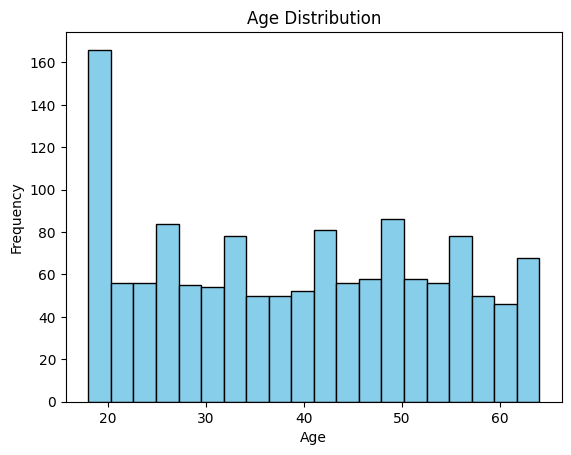

In [59]:
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### **2. Gender: Bar Chart**

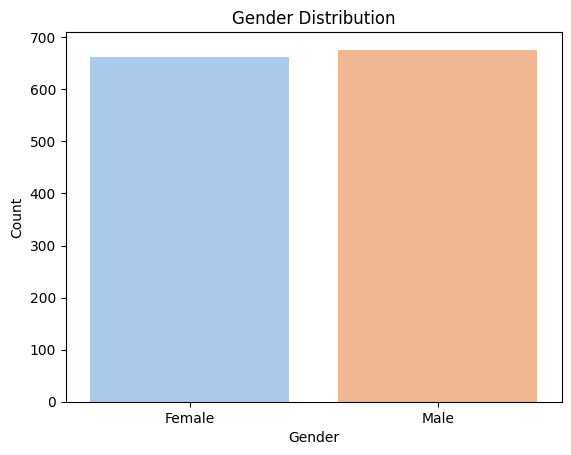

In [60]:
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### **3. BMI: Histogram**

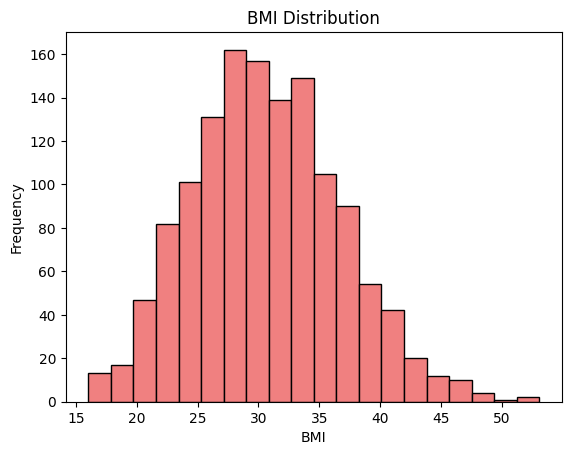

In [61]:
plt.hist(data['BMI'], bins=20, color='lightcoral', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### **4. Children: Count Plot**

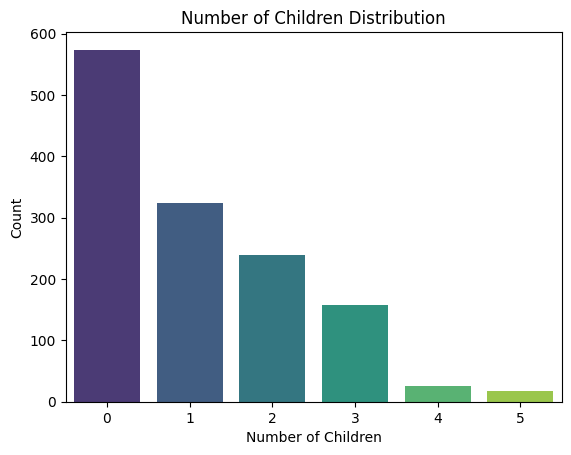

In [62]:
sns.countplot(x='Children', data=data, palette='viridis')
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

### **5. Smoker: Pie Chart**

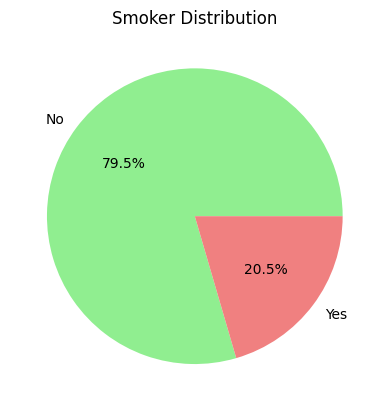

In [63]:
smoker_counts = data['Smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Smoker Distribution')
plt.show()

### **6. Region: Count Plot**

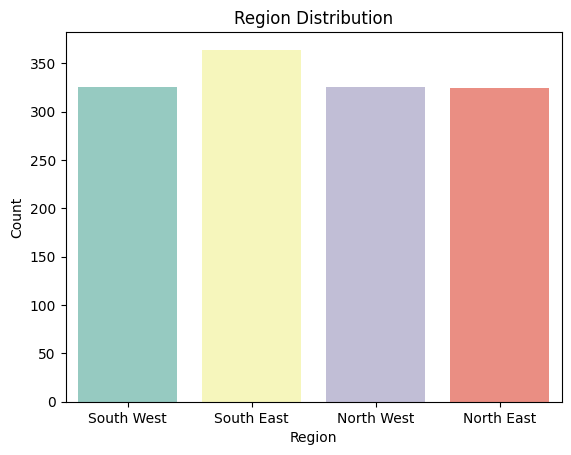

In [64]:
sns.countplot(x='Region', data=data, palette='Set3')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### **7. Expenses: Distribution Plot**

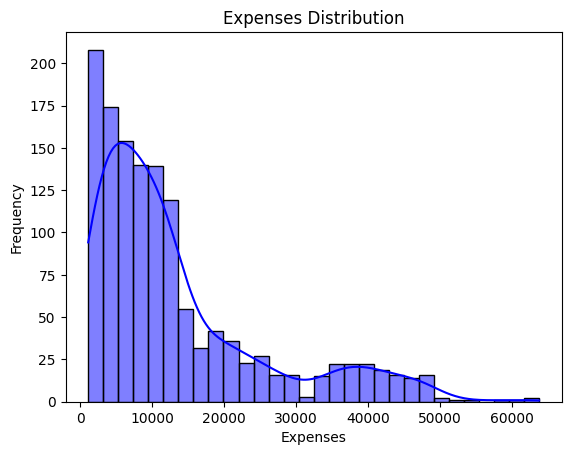

In [65]:
sns.histplot(data['Expenses'], kde=True, color='blue', bins=30)
plt.title('Expenses Distribution')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

Mean Squared Error: 33600065.355077825
R-squared: 0.7835726930039906


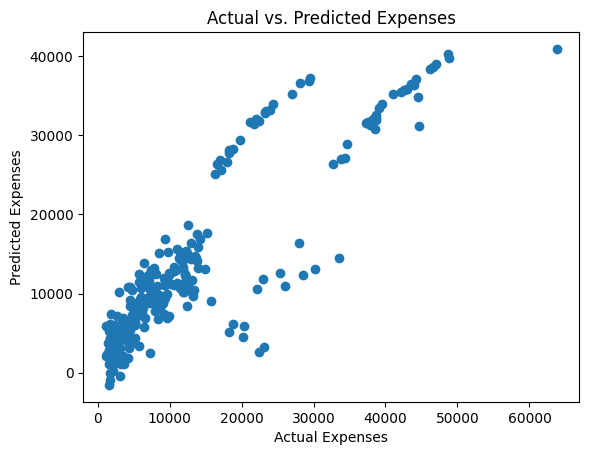

In [66]:
# Assuming data is your DataFrame with columns 'Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Expenses'
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker', 'Region'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('Expenses', axis=1)
y = data_encoded['Expenses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs. Predicted Expenses')
plt.show()

In [67]:
# Add 'Predicted Expenses' column to the DataFrame rounded to 2 decimal points
data['Predicted Expenses'] = model.predict(X).round(2)

# Calculate the difference between actual and predicted expenses
data['Difference'] = data['Predicted Expenses'] - data['Expenses']

# Display the DataFrame with the new columns
data[['Age', 'BMI', 'Children', 'Smoker', 'Region', 'Expenses', 'Predicted Expenses', 'Difference']].head()

,Age,BMI,Children,Smoker,Region,Expenses,Predicted Expenses,Difference
0,19,27.9,0,Yes,South West,16884.92,25196.35,8311.43
1,18,33.8,1,No,South East,1725.55,3836.62,2111.07
2,28,33.0,3,No,South East,4449.46,6987.64,2538.18
3,33,22.7,0,No,North West,21984.47,3810.00,-18174.47
4,32,28.9,0,No,North West,3866.86,5644.13,1777.27


In [68]:
# Write the DataFrame to a new CSV file
data.to_csv(data_path2, index=False)

# Display a message indicating the successful write
print(f'Data has been written to {data_path2}')

Data has been written to /content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Insurance Data/Insurance_data.csv


In [70]:
# Filter data with negative Difference
minus_data = data[data['Difference'] < 0]

# Display the filtered DataFrame
minus_data.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses,Predicted Expenses,Difference
3,33,Male,22.7,0,No,North West,21984.47,3810.00,-18174.47
9,60,Female,25.8,0,No,North West,28923.14,11811.87,-17111.27
14,27,Male,42.1,0,Yes,South East,39611.76,32173.25,-7438.51
15,19,Male,24.6,1,No,South West,1837.24,840.16,-997.08
17,23,Male,23.8,0,No,North East,2395.17,1981.75,-413.42


In [71]:
# Filter data with negative Difference
plus_data = data[data['Difference'] > 0]

# Display the filtered DataFrame
plus_data.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses,Predicted Expenses,Difference
0,19,Female,27.9,0,Yes,South West,16884.92,25196.35,8311.43
1,18,Male,33.8,1,No,South East,1725.55,3836.62,2111.07
2,28,Male,33.0,3,No,South East,4449.46,6987.64,2538.18
4,32,Male,28.9,0,No,North West,3866.86,5644.13,1777.27
5,31,Female,25.7,0,No,South East,3756.62,4038.02,281.40


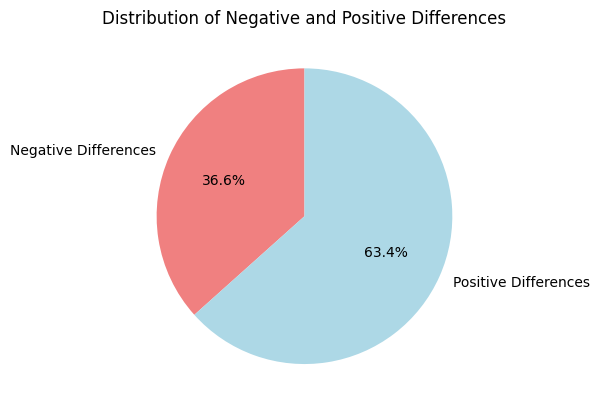

In [73]:
# Count the occurrences of negative and positive Differences
minus_counts = len(minus_data)
plus_counts = len(plus_data)

# Create a pie chart
labels = ['Negative Differences', 'Positive Differences']
sizes = [minus_counts, plus_counts]
colors = ['lightcoral', 'lightblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Negative and Positive Differences')
plt.show()

In [74]:
plus_data.describe()

,Age,BMI,Children,Expenses,Predicted Expenses,Difference
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,39.462264,31.898349,1.089623,9047.625153,12397.924599,3350.299446
std,13.453264,5.397994,1.191860,6151.300929,8350.957846,2947.428365
min,18.000000,17.200000,0.000000,1131.510000,1426.330000,4.150000
25%,28.000000,28.100000,0.000000,4433.787500,6589.220000,1220.022500
50%,40.000000,31.300000,1.000000,7730.540000,10371.820000,2397.575000
75%,50.000000,35.200000,2.000000,11862.082500,14474.960000,4171.625000
max,64.000000,53.100000,5.000000,32787.460000,38183.030000,11338.750000


In [75]:
minus_data.describe()

,Age,BMI,Children,Expenses,Predicted Expenses,Difference
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,38.765306,28.531837,1.104082,20578.447061,14900.611327,-5677.835735
std,15.030712,6.634418,1.229903,15842.651621,13143.387436,5758.417451
min,18.000000,16.000000,0.000000,1121.870000,-1933.740000,-29740.490000
25%,24.000000,23.325000,0.000000,6784.275000,4026.635000,-7776.222500
50%,38.000000,26.900000,1.000000,14255.400000,10208.075000,-4048.245000
75%,53.000000,33.600000,2.000000,36179.195000,28886.325000,-1008.095000
max,64.000000,52.600000,5.000000,63770.430000,40917.120000,-1.340000


In [79]:
# Filter Smokers in plus_data
smoker_plus_data = plus_data[plus_data['Smoker'] == 'Yes']
nonsmoker_plus_data = plus_data[plus_data['Smoker'] == 'No']

# Filter Smokers in minus_data
smoker_minus_data = minus_data[minus_data['Smoker'] == 'Yes']
nonsmoker_minus_data = minus_data[minus_data['Smoker'] == 'No']

# Display the filtered DataFrames
print("Smokers in Positive Difference:", smoker_plus_data['Smoker'].count())
print("\nNon-Smokers in Positive Difference:", nonsmoker_plus_data['Smoker'].count())
print("\nSmokers in Negative Difference:", smoker_minus_data['Smoker'].count())
print("\nNon-Smokers in Negative Difference:", nonsmoker_minus_data['Smoker'].count())

Smokers in Positive Difference: 124

Non-Smokers in Positive Difference: 724

Smokers in Negative Difference: 150

Non-Smokers in Negative Difference: 340


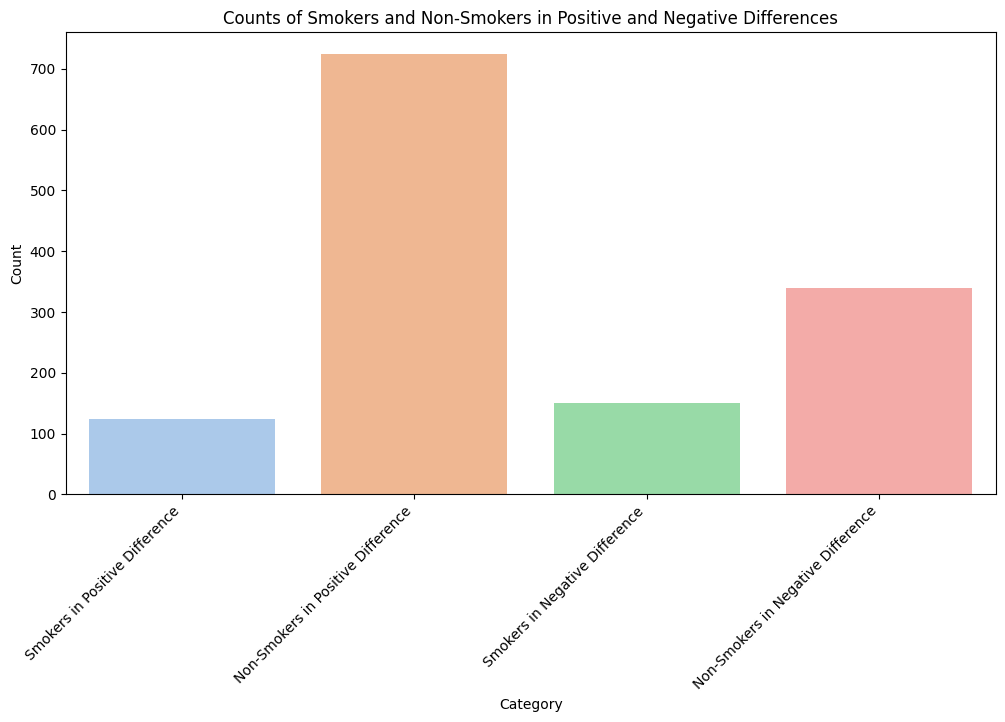

In [83]:
# Combine the data for the plot
combined_data = pd.concat([
    pd.DataFrame({'Category': 'Smokers in Positive Difference', 'Count': [smoker_plus_data.shape[0]]}),
    pd.DataFrame({'Category': 'Non-Smokers in Positive Difference', 'Count': [nonsmoker_plus_data.shape[0]]}),
    pd.DataFrame({'Category': 'Smokers in Negative Difference', 'Count': [smoker_minus_data.shape[0]]}),
    pd.DataFrame({'Category': 'Non-Smokers in Negative Difference', 'Count': [nonsmoker_minus_data.shape[0]]})
])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=combined_data, palette='pastel')
plt.title('Counts of Smokers and Non-Smokers in Positive and Negative Differences')
plt.xticks(rotation=45, ha='right')
plt.show()

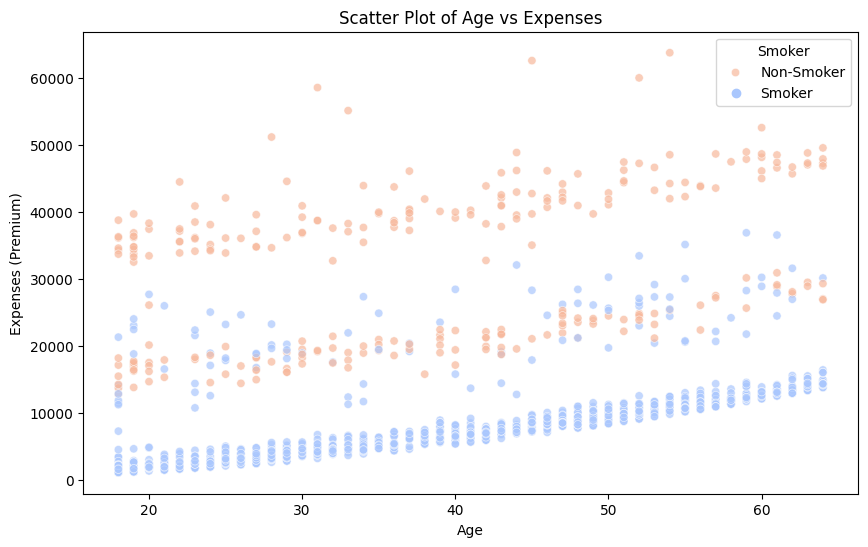

In [84]:
# Assuming df is your DataFrame with columns 'Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Expenses'
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker', 'Region'], drop_first=True)

# Scatter plot for Age vs Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Expenses', data=df_encoded, hue='Smoker_Yes', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Age vs Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses (Premium)')
plt.legend(title='Smoker', loc='upper right', labels=['Non-Smoker', 'Smoker'])
plt.show()